#Pure convolution Network:
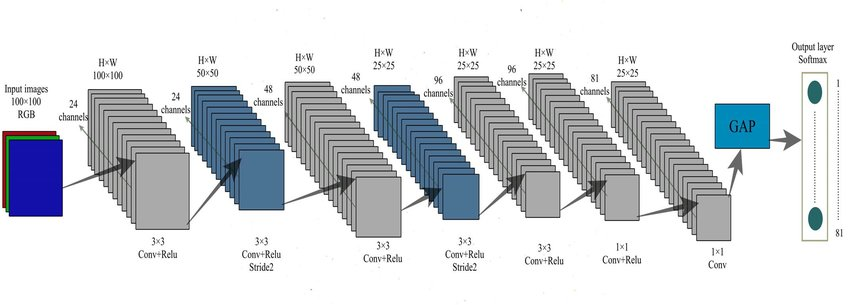

In [4]:
# https://keras.io/
#We are first installing the keras package via pip install and importing the keras package
# !pip install -q keras
# import keras
import tensorflow as tf

A fully connected layer refers to a neural network in which each input node is connected to each output node. In a convolutional layer, not all nodes are connected.

### Why convolutional neural network is better than fully connected neural network?
Image result for pure convolutional network vs fully connected layer
Convolutions are not densely connected, not all input nodes affect all output nodes. This gives convolutional layers more flexibility in learning. Moreover, the number of weights per layer is a lot smaller, which helps a lot with high-dimensional inputs such as image data.

- Check the accuracy for Pure convo and FC. 
- FC always have high accuracy
- But pure convo has higher training rate (fast)
- if FC has 99 and Conv has 97 then choose pure convo network
- If there is huge difference like 80's for pure convo, go for FC

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. The database is also widely used for training and testing in the field of machine learning
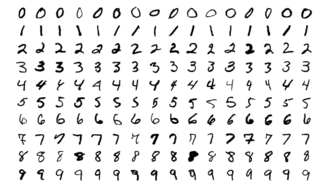

In [5]:
pip install np_utils

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 KB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56460 sha256=88cb729cdd81ef32882b4f90fc739b2d41f48ae4cd0b57a63d5ad18a030f90c3
  Stored in directory: /root/.cache/pip/wheels/55/8b/e7/a23fd46c709c21e3e6fcb55978d88b018f80d54018459978c3
Successfully built np_utils


In [6]:
# importing the numpy package with the alias np
import numpy as np
from tensorflow import keras
# importing sequential model from keras.models
from tensorflow.keras.models import Sequential
# importing different layers and activations from keras.layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Add
from tensorflow.keras.layers import Conv2D, MaxPooling2D
# importing np_utils from keras.utils
#from tensorflow.keras.utils import np_utils
from keras.utils.np_utils import to_categorical
# importing the mnist dataset from tensorflow.keras.datasets 
from tensorflow.keras.datasets import mnist

In [7]:
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical

### Loading MNIST data into train and test sets: these data are pre shuffled

In [8]:
# we are downloading the MNIST dataset and splitting the data for training and testing
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


(60000, 28, 28)


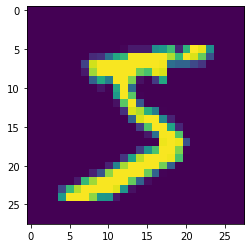

In [9]:

# printing out the shape of x_train
print (X_train.shape)

# importing pyplot with alias plt from matplotlib package
from matplotlib import pyplot as plt
# %matplotlib inline is a magic function to show us the plots in a notebook
%matplotlib inline
# plotting the first image or the image at index zero in the training dataset
plt.imshow(X_train[0])

In [10]:
print(y_train.shape)

(60000,)


TypeError: ignored

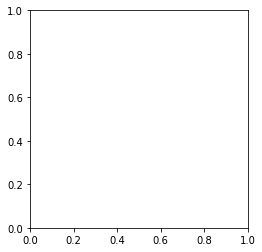

In [11]:
plt.imshow(y_train[0])

In [12]:
#Reshaping our training and testing datatset using numpy's reshape function which we will feed to the model
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [13]:
#Doing type conversion or changing the datatype to float32 for the data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
#Doing standardization or normalization here dividind each pixel by 255 in the train and test data
X_train /= 255
X_test /= 255

In [14]:

#Checking first 10 image labels
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [15]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
# simply we can say we are doing sort of onehot encoding
Y_train = keras.utils.to_categorical(y_train, 10)
Y_test = keras.utils.to_categorical(y_test, 10)

# from tensorflow.keras.utils import to_categorical

In [16]:

# having a look in the first 10 datapoints after onehot encoding
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

For mnist dataset, highest accuracy is 95% for AN and for classic CNN and unconvo network almost 98%
it has been proven using finetuning that applying dropout for each layer increases accuracy. Normally dropout is used in first or last fully connected layer 

## To create pure convolution network (not single FC) 
1. import : Batch normalization applies a transformation that maintains the mean output close to 0 and the output standard deviation close to 1.
2. activation package to use ReLu activation at the last layer. 
3. Use sequential model to add all the layers
4. Each layer has 1.2Dconvolution layer 2.Normalization() is called 3. Dropout layers. Bathnorn() is regularisation. 
5. Only 2D convolution at the last layer: FC layers are not good to add always. 
6. Flattening layer: 
Flattening is used to convert all the resultant 2-Dimensional arrays from pooled feature maps into a single long continuous linear vector. The flattened matrix is fed as input to the fully connected layer to classify the image.
7. softmax to classify image. 


## Receptive field:
--It is the region where the input neuron consider. 
- I have set RF to 3x3, it mean 3x3 pixels are considered 
- RF increases as channel dimension decreases.
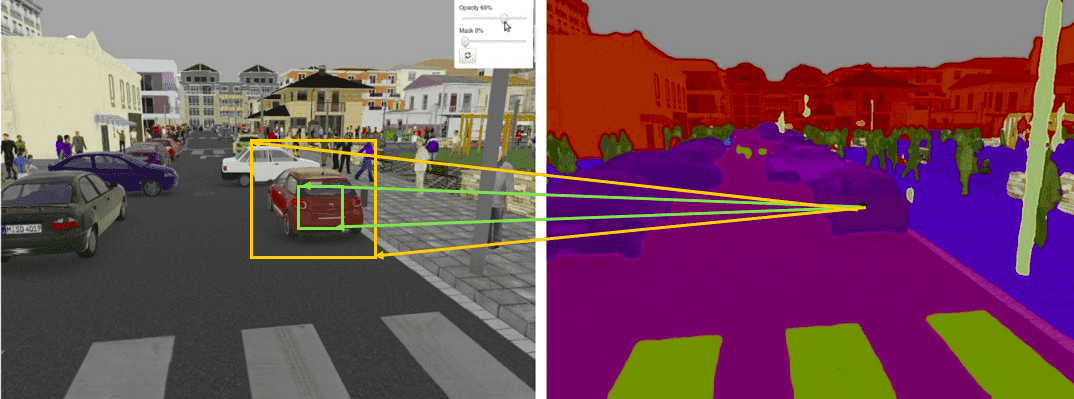

- Channel dimension  RF
- 28x28->            3x3
- 26x26 ->             5x5
- 24x24 ->7x7

## weight decay
- regularization technique (l2)
- FCs are prone to overfittng. 
- When I work with deep network, common problem is vanishing gradient. 
- I need to have a technique to deal with weight update.
- To generalise (make more available) dataset, we use augmentaion technique. Real world data do not have necessary number of parameters, so we use generalisation techniques for model. That is weight decay 
- One way to do is to **Penalise complexity** so that my model be less complex
- penalize complexity, would be to add all our parameters (weights) to our loss function. But I do have negative weights too, in order to avoid wrong value, I will square the sum
- sum of squares with another smaller number. This number is called weight decay or wd.
- 3 values for weight decay, the default 0.01 , the best value of 0.1 and a large value of 10 . In the first case our model takes more epochs to fit.
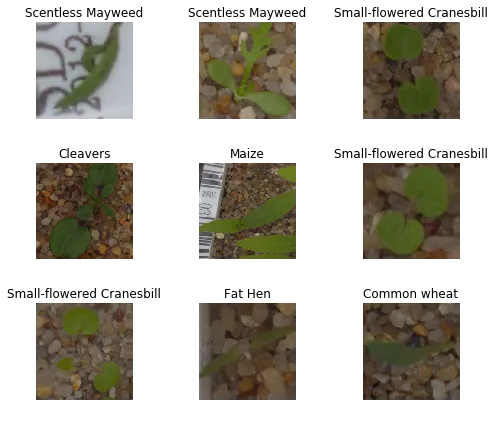

In [17]:

# importing Activation, BatchNormalization and MaxPooling2D from tensorflow.keras.layers for performing maxpooling and batchnormalizing operations and adding non linearity via activation functions
from tensorflow.keras.layers import Activation,BatchNormalization
# building our sequential model using the Sequential class and creating the model object
model = Sequential()
# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Conv2D(10, 3, 3, activation='relu', input_shape=(28,28,1))) # channel dimensions = 26x26x10    and Receptive field = 3x3
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout        
model.add(Conv2D(16, 3, 3, activation='relu'))                        # channel dimensions = 24x24x16    and Receptive field = 5x5
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed Maxpoooling operation
model.add(Conv2D(10, 1, 1, activation='relu')) #24                    # channel dimensions = 24x24x10    and Receptive field = 7x7 using 1x1 kernel
model.add(MaxPooling2D(pool_size=(2, 2)))#12                                 # channel dimensions = 12x12x10    and Receptive field = 14x14

# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Conv2D(16, 3, 3, activation='relu'))#10                     # channel dimensions = 10x10x16    and Receptive field = 16x16
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Conv2D(16, 3, 3, activation='relu'))#8                      # channel dimensions = 8x8x16    and Receptive field = 18x18
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Conv2D(16, 3, 3, activation='relu'))#6                      # channel dimensions = 6x6x16    and Receptive field = 20x20
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing 2dconvolution followed by BatchNormalization and Dropout
model.add(Conv2D(16, 3, 3, activation='relu'))#4                      # channel dimensions = 4x4x16    and Receptive field = 22x22
model.add(BatchNormalization())
model.add(Dropout(0.1))

# Performing only 2dconvolution at the last convolution layer(no batchnormalization and dropout)
model.add(Conv2D(10, 4, 4))                                           # using 4x4 kernel to see the complete image

# Here we are Flateening our dat i.e making it one dimensional which we will feed to the network.
model.add(Flatten())
#Using softmax activation function at the last layer which is used for multi class classification
model.add(Activation('softmax'))


ValueError: ignored

- We have 10 layers here. 
- 1st is input layer, 3rd maxpooling, till 8th all pure convolution network
- 8th layer is just convolutional layer
- 9th layer is used to flatten 
- Last layer is softmax activation function. 
- Consider layer 7 and its channel dimesion is 4X4, that's why the next layer has input of 4X4 dimension

In [25]:
import tensorflow as tf

print(tf.version)

<module 'tensorflow._api.v2.version' from '/usr/local/lib/python3.8/dist-packages/tensorflow/_api/v2/version/__init__.py'>


In [24]:
# Seeing the summary of the complete model
model.summary()
#Trainable Parameters for a given between 2 layers of an artificial neural network is a sum of total weights and total biases that exist between them.
#FPS(frame per second) or processing of frames should be high. In this case Trainable parameters are 12K and total parametrs are 13k
# trainable parameters are very low in FC, hence 
#removing FC will reduce accuracy but training is faster in fully convolution 


ValueError: ignored

Trained for 20 epochhs. last accuracy is 99%
- Is it overfitting? 
No. As for the past epochs' accuracy is almost 99 and there is no diffences, hence there is no overfitting. Started with 0.98 and for 5 epochs it is same ]
- As this is msit commond data, I am getting good accuracy.
- for real world data, I will definitely not get 99%

In [ ]:
# We are importing the Adam Optimizer
from tensorflow.keras.optimizers import Adam

# We are importing the learningratescheduler callback
from tensorflow.keras.callbacks import LearningRateScheduler
#Creating the "scheduler" function with two arguments i.e learningrate and epoch
def scheduler(epoch, lr):
  return round(0.003 * 1/(1 + 0.319 * epoch), 10)

#	LearningRate = LearningRate * 1/(1 + decay * epoch) here decay is 0.319 and epoch is 10.

# here we are compiling our model and using 'categorical_crossentropy' as our loss function and adam as our optimizer with learning rate =0.003 and metrics is accuracy
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.003), metrics=['accuracy'])

# Here we are traing our model using the data and using batch size of 128,number of epochs are 20 and using verbose=1 for printing out all the results.
# In the callbacks parameter we are using the LearningRateScheduler which takes two arguments scheduler function which we built earlier to reduce the learning rate in each decay and verbose =1
model.fit(X_train, Y_train, batch_size=128, epochs=20, verbose=1, validation_data=(X_test, Y_test), callbacks=[LearningRateScheduler(scheduler, verbose=1)])

Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.003.
60000/60000 [==============================] - 9s 153us/step - loss: 0.2244 - acc: 0.9291 - val_loss: 0.0603 - val_acc: 0.9814
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.0022744503.
60000/60000 [==============================] - 6s 99us/step - loss: 0.0682 - acc: 0.9782 - val_loss: 0.0394 - val_acc: 0.9859
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.0018315018.
60000/60000 [==============================] - 6s 100us/step - loss: 0.0516 - acc: 0.9840 - val_loss: 0.0339 - val_acc: 0.9885
Epoch 4/20

Epoch 00004: LearningRateScheduler setting learning rate to 0.0015329586.
60000/60000 [==============================] - 6s 101us/step - loss: 0.0427 - acc: 0.9866 - val_loss: 0.0436 - val_acc: 0.9846
Epoch 5/20

Epoch 00005: LearningRateScheduler setting lea

### Acheiving validation accuracy 99.40 in 16th epoch.

In [ ]:
# Here we are evaluating our model using the test data and saving the results in score variable
score = model.evaluate(X_test, Y_test, verbose=0)

In [ ]:
#printing the score or evaluation results
print(score)

[0.016840848704172823, 0.9948]


In [ ]:
#Finally we are doing the predictions
y_pred = model.predict(X_test)

In [ ]:
# Showing the results of predictions
print(y_pred[:9])
print(y_test[:9])

[[1.18588875e-10 1.10197384e-07 9.42100868e-08 6.47855058e-09
  1.69207333e-08 4.17292728e-10 3.07542240e-13 9.99999642e-01
  9.12085338e-11 1.54161228e-07]
 [1.76716426e-07 1.01692115e-06 9.99997020e-01 2.61500765e-10
  3.52892759e-09 6.02455724e-11 1.73723936e-06 4.81673978e-10
  9.86598137e-10 7.51033957e-10]
 [4.95402723e-08 9.99971867e-01 1.43412436e-07 7.42149764e-09
  4.27223176e-06 5.64623903e-08 6.43634053e-07 1.40830582e-06
  2.14284719e-05 9.93460958e-08]
 [9.99749243e-01 2.12012385e-09 1.55717217e-07 1.60171410e-07
  9.67361657e-08 6.64419986e-08 2.48599041e-04 4.07770955e-08
  8.21720391e-07 7.01890883e-07]
 [1.39640198e-12 7.38510697e-10 9.39136546e-11 1.75288006e-09
  9.99962568e-01 5.38754152e-10 1.31076794e-08 3.79924785e-08
  3.76838614e-07 3.70355738e-05]
 [3.12427928e-09 9.99992728e-01 8.69713723e-09 2.73719630e-10
  2.87195166e-06 1.32144284e-09 3.16081348e-08 3.78219397e-06
  5.56979444e-07 5.58845734e-08]
 [8.57431259e-13 2.28732205e-07 1.04959685e-09 9.54893066e